In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Downloads/loans_full_schema.csv')

In [6]:
df.head(3)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0


# Cleaning

In [8]:
df.shape

(10000, 55)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [10]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [ ]:
df.describe(include="all")

In [11]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


Data có nhiều giá trị null ở các cột

In [15]:
#Chuyển đổi các giá trị null thành not specified trong cột emp_title
df['emp_title'] = df['emp_title'].fillna("not specified")

#Chuyển đổi các giá trị null thành not specified trong cột verification_income_joint
df['verification_income_joint'] = df['verification_income_joint'].fillna("not specified")

#Chuyển đổi các giá trị NA thành mean trong cột months_since_90d_late
df['months_since_90d_late'] = df['months_since_90d_late'].fillna(df['months_since_90d_late'].mean())

# Chuyển đổi các giá trị NA thành mean trong cột months_since_last_credit_inquiry    
df['months_since_last_credit_inquiry'] = df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].mean())

# Tất cả các khách hàng không có tài khoản nào trễ hạn quá 120 ngày hoặc không xác định nên ta xóa cột này đi. Vì không hữu ích.   
#df = df.drop(['num_accounts_120d_past_due'], axis=1)

#Chuyển đổi các giá trị null thành not specified trong cột emp_title
df['emp_title'] = df['emp_title'].fillna("not specified")

#Chuyển đổi các giá trị null thành not specified trong cột verification_income_joint
df['verification_income_joint'] = df['verification_income_joint'].fillna("not specified")

In [17]:
df = df.fillna(df.mean())

/var/folders/h_/zh8kq2q970j7jgbpckxd9gj80000gn/T/ipykernel_8653/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [18]:
df.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfac

# Exploratory Data Analysis (EDA)

In [19]:
loans_copy = df.copy()

In [20]:
#Check tương quan
corr_price = loans_copy[df.columns[:]].corr()['interest_rate'][:]
corr_price

emp_length                         -0.028405
annual_income                      -0.099584
debt_to_income                      0.141393
annual_income_joint                -0.068583
debt_to_income_joint                0.110519
delinq_2y                           0.090456
months_since_last_delinq           -0.053720
earliest_credit_line                0.103635
inquiries_last_12m                  0.131193
total_credit_lines                 -0.044435
open_credit_lines                  -0.012773
total_credit_limit                 -0.130497
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_historical_failed_to_pay        0.037563
months_since_90d_late              -0.033451
current_accounts_delinq             0.007184
total_collection_amount_ever        0.013532
current_installment_accounts        0.047131
accounts_opened_24m                 0.120657
months_since_last_credit_inquiry   -0.094503
num_satisfactory_accounts          -0.013330
num_accoun

In [21]:
summary_by_state = df.groupby(["state"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [22]:
summary_by_state.sort_values('no_borrowers', ascending=False, inplace=True, ignore_index=True)

In [23]:
summary_by_state['Percentage'] = summary_by_state['no_borrowers']/summary_by_state['no_borrowers'].sum()*100

In [24]:
summary_by_state['Cummulate']  = summary_by_state['Percentage'].cumsum()

In [26]:
summary_by_state.head()

,state,no_borrowers,total_loan_amount,Percentage,Cummulate
0,CA,1330,22073700,13.30,13.30
1,TX,806,13755275,8.06,21.36
2,NY,793,12589650,7.93,29.29
3,FL,732,11203675,7.32,36.61
4,IL,382,6776600,3.82,40.43


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

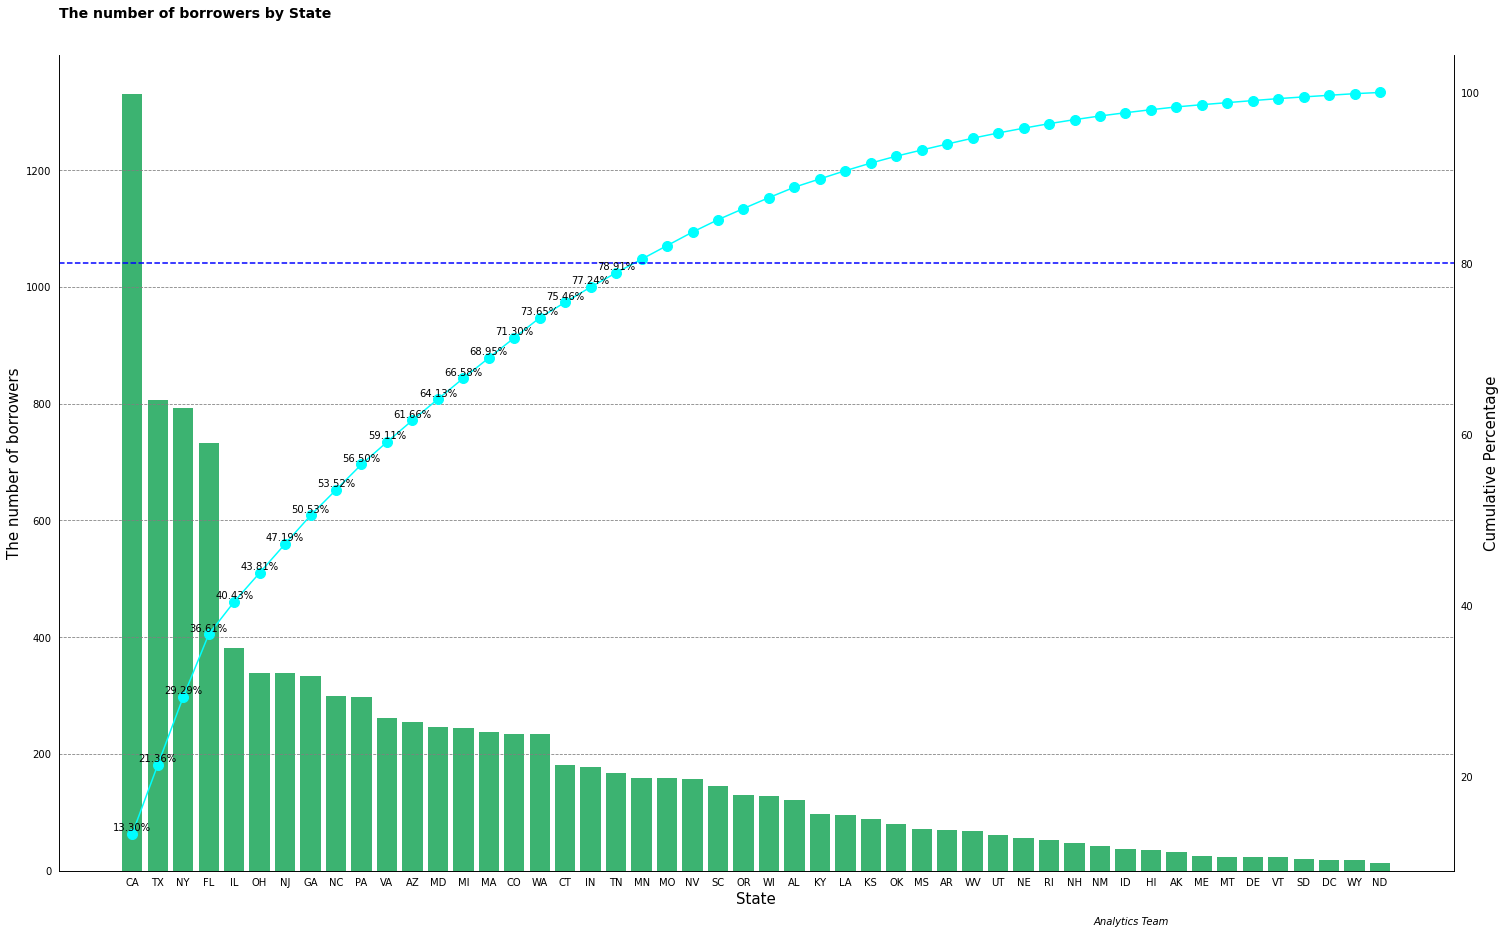

In [29]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = summary_by_state['state']
ys = summary_by_state['no_borrowers']
yl = summary_by_state['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')
"""
for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
"""
#ax1.set_title("The number of borrowers by State", fontsize = 25, color = 'blue')
ax1.set_xlabel("State", fontsize = 15)
ax1.set_ylabel("The number of borrowers", fontsize = 15)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(80, color="blue", linestyle="--") # Tạo đường 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
        
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False) 

ax2.set_ylabel("Cumulative Percentage", fontsize = 15)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False) 

plt.suptitle('The number of borrowers by State', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

CA là bang có số lượng người vay nhiều nhất. Các bang TX, NY, FL cũng có số lượng người vay vượt trội hơn so với các bang còn lại.

5 bang có lượng người vay cao nhất đã chiếm gần 40% trong tổng số lượng người vay

In [30]:
summary_by_state['proportion'] = summary_by_state['total_loan_amount']/summary_by_state['total_loan_amount'].sum()*100
top5_state = summary_by_state.loc[:, ['state','total_loan_amount','proportion']].head(5).copy()
top5_state['total_loan_amount'] = top5_state['total_loan_amount']/1000
top5_state.sort_values('total_loan_amount', ascending=True, inplace=True, ignore_index=True)
top5_state

,state,total_loan_amount,proportion
0,IL,6776.600,4.141689
1,FL,11203.675,6.847407
2,NY,12589.650,7.694481
3,TX,13755.275,8.406882
4,CA,22073.700,13.490896


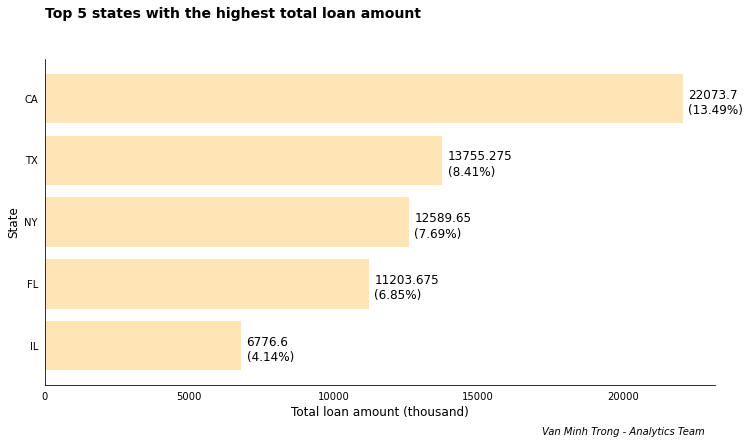

In [31]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('state', 'total_loan_amount', data=top5_state, color='#ffe4b5')

# Show dữ liệu 
    # hoặc có thể dùng lệnh sau nếu không cần show %: ax.bar_label(bar1, size=10) # thêm option fmt='%.1f' nếu muốn format số)
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top5_state.total_loan_amount[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t2 = ax.annotate('('+str(top5_state.proportion.round(2)[i])+'%)', xy=(p.get_width()+200, p.get_y()+0.15))
    t1.set(size=12)
    t2.set(size=12)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Top 5 states with the highest total loan amount', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Total loan amount (thousand)', size=12)
plt.ylabel('State', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Đi cũng với số lượng người vay cao nhất, thì 5 bang CA, TX, NY, FL, IL cũng có lượng tiền được cho vay cao nhất

In [32]:
summary_by_loan_purpose = df.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

summary_by_loan_purpose.sort_values('no_borrowers', ascending=True, inplace=True, ignore_index=True)

summary_by_loan_purpose

,loan_purpose,no_borrowers,total_loan_amount
0,renewable_energy,10,140000
1,vacation,62,421900
2,moving,69,682675
3,small_business,125,2477500
4,car,131,1361250
5,house,151,2689275
6,medical,162,1836800
7,major_purchase,303,4752425
8,home_improvement,680,11719225
9,other,914,11819025


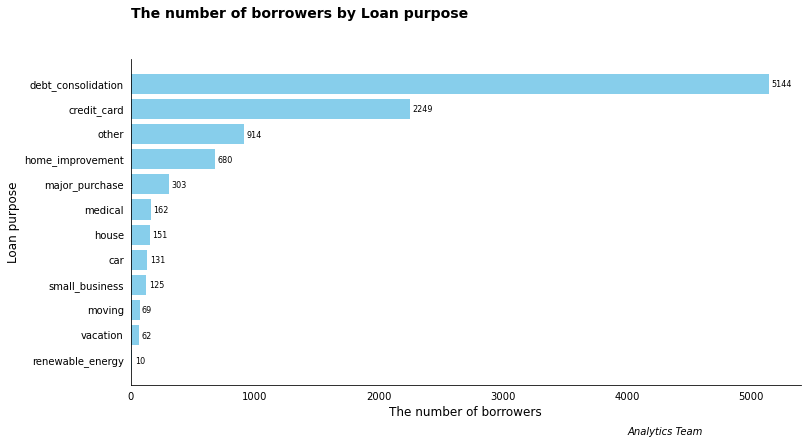

In [34]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('loan_purpose', 'no_borrowers', data=summary_by_loan_purpose, color='#87ceeb')

# Show dữ liệu 
    # hoặc có thể dùng lệnh sau nếu không cần show %: ax.bar_label(bar1, size=10) # thêm option fmt='%.1f' nếu muốn format số)
i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.no_borrowers[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/3)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of borrowers', size=12)
plt.ylabel('Loan purpose', size=12)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Các khoản vay chủ yếu cho hoạt động hợp nhất nợ (debt_consolidation)

Tiếp đến là các khoản vay để mua sắm thông qua các thẻ tín dụng và sửa chữa, cải tạo nhà ở

Với danh mục cho mục đích khoản vay thì ta thấy phần lớn khách hàng thuộc debt consolidation (hợp nhất nợ) nghĩa là trên một lần vay thì họ sẽ vay cho nhiều mục đích khác nhau chứ không nhất thiết với mục đích riêng lẻ như chỉ mua nhà, mua xe, kinh doanh,... và chiếm đến 45,66% gần một nửa so với các mục đích vay khác.

# Data Preprocessing

In [35]:
data = df.loc[:,['interest_rate','loan_amount','term','grade','sub_grade','annual_income','homeownership','verified_income','debt_to_income']].copy()

In [36]:
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [37]:
#LabelEncoder cho các trường grade, sub_grade, homeownership, verified_income
list_lable = ['grade', 'sub_grade', 'homeownership', 'verified_income']
for i in list_lable:
    data[i] = LabelEncoder().fit_transform(data[i])

In [38]:
data.head()

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,2,12,90000.0,0,2,18.01
1,12.61,5000,36,2,10,40000.0,2,0,5.04
2,17.09,2000,36,3,15,40000.0,2,1,21.15
3,6.72,21600,36,0,2,30000.0,2,0,10.16
4,14.07,23000,36,2,12,35000.0,2,2,57.96


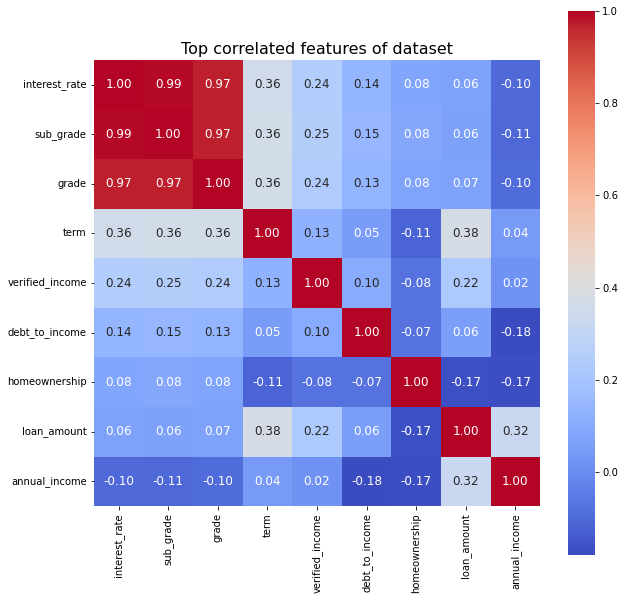

In [39]:
top = 10
corr = data.corr()
top15 = corr.nlargest(top, 'interest_rate')['interest_rate'].index
corr_top15 = data[top15].corr()

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

Có 2 biến grade và sub_grade có hệ số tương quan đối với biến interest_rate là lớn so với các biến còn lại

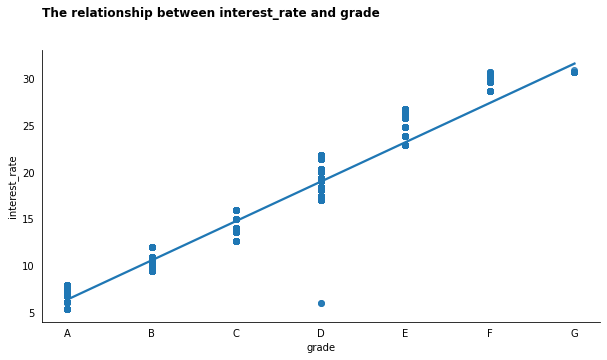

In [40]:
#corr check
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['grade'], y=data['interest_rate'], data=data)

ax.set_xticks((0,1,2,3,4,5,6))
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F','G'))

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
plt.suptitle('The relationship between interest_rate and grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()

In [41]:
pearson_coef, p_value = stats.pearsonr(data['grade'], data['interest_rate'])
print("Correlation Coefficient giữa grade và interest_rate là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient giữa grade và interest_rate là 0.9694016378508195 và giá trị P-value là  0.0


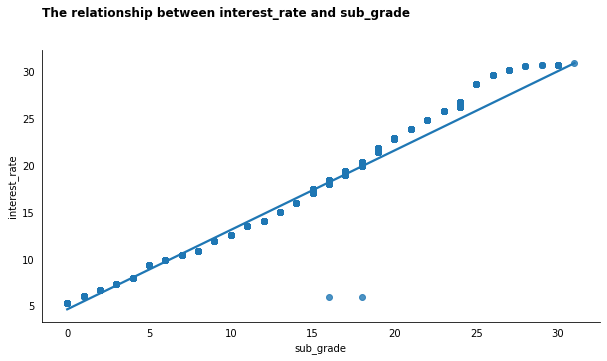

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['sub_grade'], y=data['interest_rate'], data=data)

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
plt.suptitle('The relationship between interest_rate and sub_grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()

In [43]:
pearson_coef, p_value = stats.pearsonr(data['sub_grade'], data['interest_rate'])
print("Correlation Coefficient giữa sub_grade và interest_rate là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient giữa sub_grade và interest_rate là 0.9929205599072609 và giá trị P-value là  0.0


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
X = data[['grade','sub_grade']]
y = data['interest_rate']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lin_reg.predict(X_test)

In [49]:
y_pred

array([20.63241294, 11.34694449,  7.08657024, ...,  9.05278471,
        6.32185031, 13.31315897])

In [50]:
intercept = lin_reg.intercept_

print(intercept)

4.792410451963088


In [51]:
slopes = lin_reg.coef_

print(slopes)

[0.43677462 0.76471993]


# Mô hình dự đoán:

interest_rate = 4.7924 + 0.4368 grade + 0.7647 sub_grade

In [52]:
print('The full R-square is : ' +str((lin_reg.score(X,y)*100).round(5)) + '%')
print('The train R-square is : ' +str((lin_reg.score(X_train, y_train)*100).round(5)) + '%')
print('The test R-square is : ' +str((lin_reg.score(X_test, y_test)*100).round(5)) + '%')

The full R-square is : 98.65013%
The train R-square is : 98.60605%
The test R-square is : 98.82589%


Hơn 98% interest_rate có thể giải thích được bằng mô hình trên

In [53]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('The MSE of interest_rate and predicted value is : ',mse.round(3))
print('The MAE of interest_rate and predicted value is : ',mae.round(3))

The MSE of interest_rate and predicted value is :  0.294
The MAE of interest_rate and predicted value is :  0.426


# Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
dataset = data.loc[:,['interest_rate','sub_grade']]

In [56]:
dataset.head()

,interest_rate,sub_grade
0,14.07,12
1,12.61,10
2,17.09,15
3,6.72,2
4,14.07,12


In [57]:
X = np.array(dataset['sub_grade']).reshape(-1,1)
y = np.array(dataset['interest_rate']).reshape(-1,1)

In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

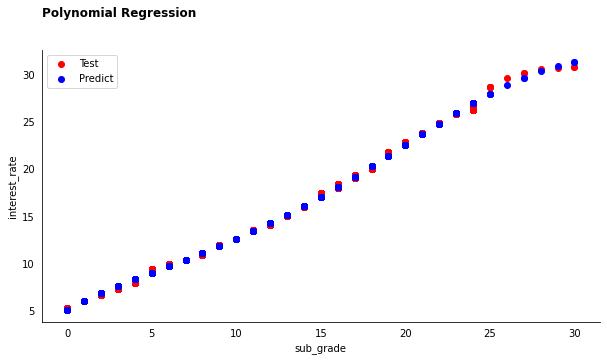

In [60]:
# Visualizing the Polymonial Regression results
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_test, y_test, color='red', label='Test')
ax.scatter(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue', label='Predict')
plt.xlabel('sub_grade')
plt.ylabel('interest_rate')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)

ax.legend()
plt.suptitle('Polynomial Regression', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()

In [61]:
print('The full R-square is : ' +str((r2_score(y, pol_reg.predict(poly_reg.fit_transform(X)))*100).round(5)) + '%')
print('The train R-square is : ' +str((r2_score(y_train, pol_reg.predict(poly_reg.fit_transform(X_train)))*100).round(5)) + '%')
print('The test R-square is : ' +str((r2_score(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))*100).round(5)) + '%')

The full R-square is : 99.66587%
The train R-square is : 99.63015%
The test R-square is : 99.80847%


Mô hình Polynomial Regression có thể giải thích được hơn 99% về interest rate

In [63]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
mae = mean_absolute_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
print('The MSE of interest_rate and predicted value is : ',mse.round(5))
print('The MAE of interest_rate and predicted value is : ',mae.round(5))

The MSE of interest_rate and predicted value is :  0.04797
The MAE of interest_rate and predicted value is :  0.17857
